In [2]:
# Молодой стажёр, решивший попробовать свои силы в анализе финансовых данных,
# получил следующее задание в банке. Ему был предоставлен датасет (bank.csv),
# представляющий собой данные клиентов банка. Его задача предсказать, будет ли
# открывать клиент депозит в этом банке (поле deposit). В качестве модели
# классификатора он использовал логистическую регрессию (соотношение тестовой
# и тренировочной выборок – 30 на 70). 
# Датасет можно скачать по ссылке https://yadi.sk/d/eTrQZWqd3ciabw
# После проведения классификации confusion matrix будет выглядеть следующим образом: (картинка)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import csv
import warnings
warnings.filterwarnings('ignore')

X = []
Y = []
array = np.zeros(11162)

with open("bank.csv", newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        X.append(row[:len(row)-1])
        Y.append(0 if row[len(row)-1] == 'no' else 1)

# Перевод значений с текстовых в числовые (16 столбцов)
def rename_text_to_num(data):
    for g in range(len(data[0])):    
        names = []
        for i in range(len(data)):
            ren = False
            for j in range(len(names)):
                if(data[i][g] ==  names[j]):
                    data[i][g] = j
                    ren = True
                    j = len(names)-1
            if(ren != True): 
                names.append(data[i][g])
                data[i][g] = len(names)-1
    return data

X = rename_text_to_num(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7)

from sklearn.linear_model import LogisticRegression

Ir = LogisticRegression()
Ir.fit(X_train,y_train)
print("lr.score train: {:.2f}%".format(Ir.score(X_train, y_train)*100))
print("lr.score test: {:.2f}%".format(Ir.score(X_test, y_test)*100))

11162
lr.score train: 77.18%
lr.score test: 76.35%


In [13]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = Ir.predict(X_test)
confusion_matrix(y_true, y_pred, labels=[1, 0])

array([[1214,  364],
       [ 389, 1382]], dtype=int64)

[[1382  389]
 [ 364 1214]]


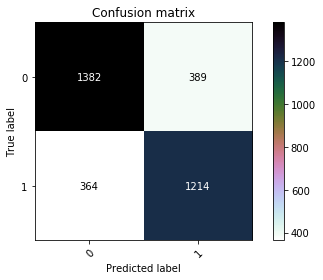

In [14]:
from sklearn.utils.multiclass import unique_labels

# Построение матрицы путаницы
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.cubehelix_r):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=[0,1])